<a href="https://colab.research.google.com/github/Leonaxi/Machine-Learning-in-Finance/blob/main/L11_Regression_with_neural_nets_2_with_haiku.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install optax dm-haiku

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 145 kB 5.1 MB/s 
     |████████████████████████████████| 350 kB 45.8 MB/s 
     |████████████████████████████████| 85 kB 4.9 MB/s 


In [4]:
import optax
import numpy as np
import jax.numpy as jnp
import jax
import matplotlib.pyplot as plt

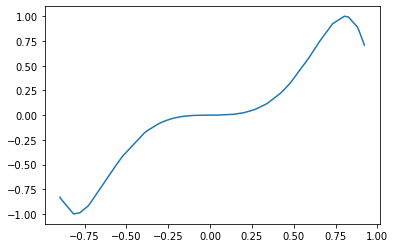

In [5]:
S = np.array([-0.8964536 , -0.8937423 , -0.8160014 , -0.8135896 , -0.7777178 ,
       -0.7306509 , -0.7196269 , -0.56077266, -0.5225189 , -0.39259458,
       -0.37080932, -0.30425978, -0.30012155, -0.26793814, -0.23755741,
       -0.20966339, -0.16642046, -0.15392852, -0.14616823, -0.09809828,
       -0.01211524,  0.02200961,  0.0394454 ,  0.04127908,  0.14237666,
        0.1488111 ,  0.20493412,  0.25775242,  0.2756691 ,  0.32817745,
        0.3374791 ,  0.34276915,  0.34953642,  0.41928077,  0.4337349 ,
        0.43921685,  0.4798982 ,  0.5894067 ,  0.5936425 ,  0.6099713 ,
        0.64054966,  0.6516247 ,  0.7327845 ,  0.8028183 ,  0.803761  ,
        0.82667255,  0.8778291 ,  0.879761  ,  0.8880968 ,  0.92238617])

payoff = np.array([-8.30690000e-01, -8.41413975e-01, -9.98246000e-01, -9.98990000e-01,
       -9.87290919e-01, -9.20819000e-01, -8.99229109e-01, -5.04697680e-01,
       -4.15037155e-01, -1.80537000e-01, -1.52362585e-01, -8.43991116e-02,
       -8.10096189e-02, -5.76740000e-02, -4.02077623e-02, -2.76460908e-02,
       -1.38269800e-02, -1.09413229e-02, -9.36858000e-03, -2.83207800e-03,
       -5.33478988e-06,  3.19850000e-05,  1.84123986e-04,  2.11016000e-04,
        8.65829000e-03,  9.88599000e-03,  2.58175954e-02,  5.13450000e-02,
        6.28057718e-02,  1.05835974e-01,  1.15053318e-01,  1.20522849e-01,
        1.27764000e-01,  2.19326511e-01,  2.42352000e-01,  2.51461000e-01,
        3.25523138e-01,  5.76370418e-01,  5.87219000e-01,  6.29451275e-01,
        7.09268000e-01,  7.37970000e-01,  9.24770000e-01,  9.99828756e-01,
        9.99915123e-01,  9.92319000e-01,  8.96705747e-01,  8.90681505e-01,
        8.62517000e-01,  7.08453476e-01])

plt.plot(S, payoff)




In [6]:
import haiku as hk # transfer things will do automatically 不需要一步步打上去了
S  = S.reshape(50, 1)

lr = 1e-3
optimizer =optax.adam

def nnet(S):
  out = hk.Linear(20)(S)  # linear trans. from 1 dimensional factor to 20 d
  out = jax.nn.relu(out) # non-linear transf.

  out = hk.Linear(1)(out) # linear trans. again
  out = jnp.squeeze(out)
  return out


In [7]:
# 因为上述function is not a true python function, it is a abstraction that haiku used
# 所以需要 ask haiku to transform it into a valid function：init, nnet = hk.transform(nnet)
# output will be 2 function: init(initialize the network); nnet(function created above)
init, nnet = hk.without_apply_rng(hk.transform(nnet))
# initialized the parameter: 2 steps: random seeds; sample parameters
# 1. provide how you initialize your parameters: randomly initialized: provide a seed to initialezed
# 2. provide sample of your fetures space 因为 haiku want to know how many features do you have in your initial dataset
rng = jax.random.PRNGKey(0)  # not use zeros, may run into trouble
Θ  = init(rng, S[0])

/usr/local/lib/python3.7/dist-packages/haiku/_src/base.py:515: UserWarning: Explicitly requested dtype float64 requested in zeros is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  param = init(shape, dtype)


In [8]:
# initialized the parameter: 2 steps: random seeds; sample parameters
rng = jax.random.PRNGKey(0)
Θ  = init(rng, S[0])

In [19]:
Θ.keys()

dict_keys(['linear', 'linear_1'])

In [11]:
Θ['linear'].keys()

dict_keys(['w', 'b'])

In [20]:
Θ['linear_1'].keys()

dict_keys(['w', 'b'])

In [16]:
Θ['linear']  # dimension of W1 will be 1*20; b1 will also be 1*20

{'w': DeviceArray([[ 4.9424145e-01, -2.6073512e-01,  2.9696274e-01,
                6.9096667e-01,  1.7020437e+00,  4.6858597e-01,
                4.3036845e-01,  8.3296478e-01,  6.5656769e-04,
               -6.9311088e-01,  7.8601891e-01, -5.0021487e-01,
               -3.2383677e-01, -4.0601933e-01,  6.3294512e-01,
               -1.0585506e+00, -2.9123566e-01, -1.6549054e+00,
               -1.7563176e+00,  5.5047482e-01]], dtype=float32),
 'b': DeviceArray([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
              0., 0., 0., 0., 0.], dtype=float32)}

In [18]:
Θ['linear']['b'].shape

(20,)

In [23]:
nnet(Θ, S)

DeviceArray([-0.61080724, -0.6089598 , -0.55599034, -0.554347  ,
             -0.52990544, -0.49783596, -0.49032462, -0.38208777,
             -0.3560232 , -0.26749805, -0.25265446, -0.20731029,
             -0.20449066, -0.1825622 , -0.16186199, -0.14285615,
             -0.11339215, -0.10488065, -0.09959312, -0.06684019,
             -0.00825483,  0.00323216,  0.00579264,  0.00606192,
              0.02090832,  0.02185323,  0.03009502,  0.03785149,
              0.0404826 ,  0.04819356,  0.04955953,  0.05033638,
              0.05133016,  0.06157228,  0.06369489,  0.06449995,
              0.07047409,  0.08655564,  0.08717768,  0.08957559,
              0.09406609,  0.09569249,  0.10761101,  0.11789554,
              0.11803403,  0.12139866,  0.12891111,  0.1291948 ,
              0.13041899,  0.13545437], dtype=float32)

In [ ]:
opt_state = optimizer(lr).init(Θ)

def mse(prediction, y):
    return ((prediction - y)**2).mean()

@jax.jit
def update(Θ, opt_state):
    def L(Θ):
      predictions  = nnet(Θ, S)
      return mse(predictions, payoff)

    grads = jax.grad(L)(Θ)
    updates, opt_state = optimizer(lr).update(grads, opt_state)
    Θ = optax.apply_updates(Θ, updates)
    return Θ,  opt_state



In [ ]:
for iteration in range(100000):
  Θ, opt_state = update(Θ, opt_state)

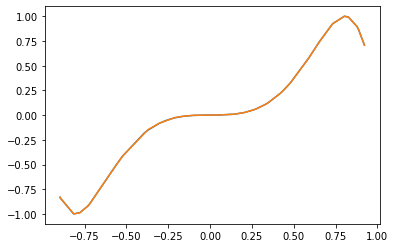

In [ ]:
prediction = nnet(Θ, S)

plt.plot(S, payoff)
plt.plot(S, prediction)

